<a href="https://colab.research.google.com/github/gajayi2023/DATA201/blob/main/Final_Project_Data_201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Note: Using the dataset project 2 for the final Pproject**.

Adult Census Income is a dataset from Kaggle that was extracted in 1994 from the Census Burean Database by Ronny Kohavi and Barry Becker.

# Dataset Features

Age : The length of time that a person has lived. Discrete (from 17 to 90)

Workclass: Private, Self-emp-not-inc, Local-gov, Federal-gov, State-gov, without-pay, never-worked

Fnlwgt: Final weight(continuous). The number of people the census believes the entry represents.

Education: The highest level of education such as Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

Education-num: The number of years of education

Marital-status: Married-civ-spouse, Divorced, Never-married, Separated,

Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse List item

Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

Sex: Female, Male

Capital-gain: continuous

Capital-loss: continuous

Hours-per-week: continuous(1 to 99)

Native-country: (42 countries) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Salary: >50K,<=50K





# Prepare and wrangle your data with Pandas and Numpy

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn import model_selection,preprocessing,linear_model,metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving adult.csv to adult.csv
User uploaded file "adult.csv" with length 4104734 bytes


In [3]:
df = pd.read_csv('adult.csv')

# Exploratory Data Analysis

In [4]:
# See the shape of the dataset
print(df.shape)
df.describe(include ="all")

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
#  Data Type
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
# the first and the last rows of the datad
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:

df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [10]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [11]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
# number of people who earn less than 50K and more than 50K
target_column = "income"
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

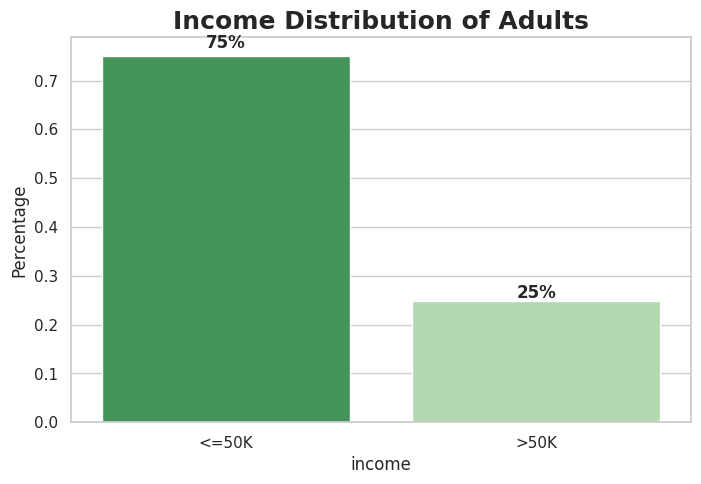

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [14]:
numerical_columns = [
    "age",
    "education.num",
    "capital.gain",
    "capital.loss",
    "hours.per.week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native.country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

df = df[all_columns]

In [15]:
# Check the number of samples and the number of columns available in the dataset
print(
    f"The dataset contains {df.shape[0]} samples and "
    f"{df.shape[1]} columns"
)

The dataset contains 30162 samples and 14 columns


In [16]:
# Compute the number of features
print(f"The dataset contains {df.shape[1] - 1} features.")

The dataset contains 13 features.


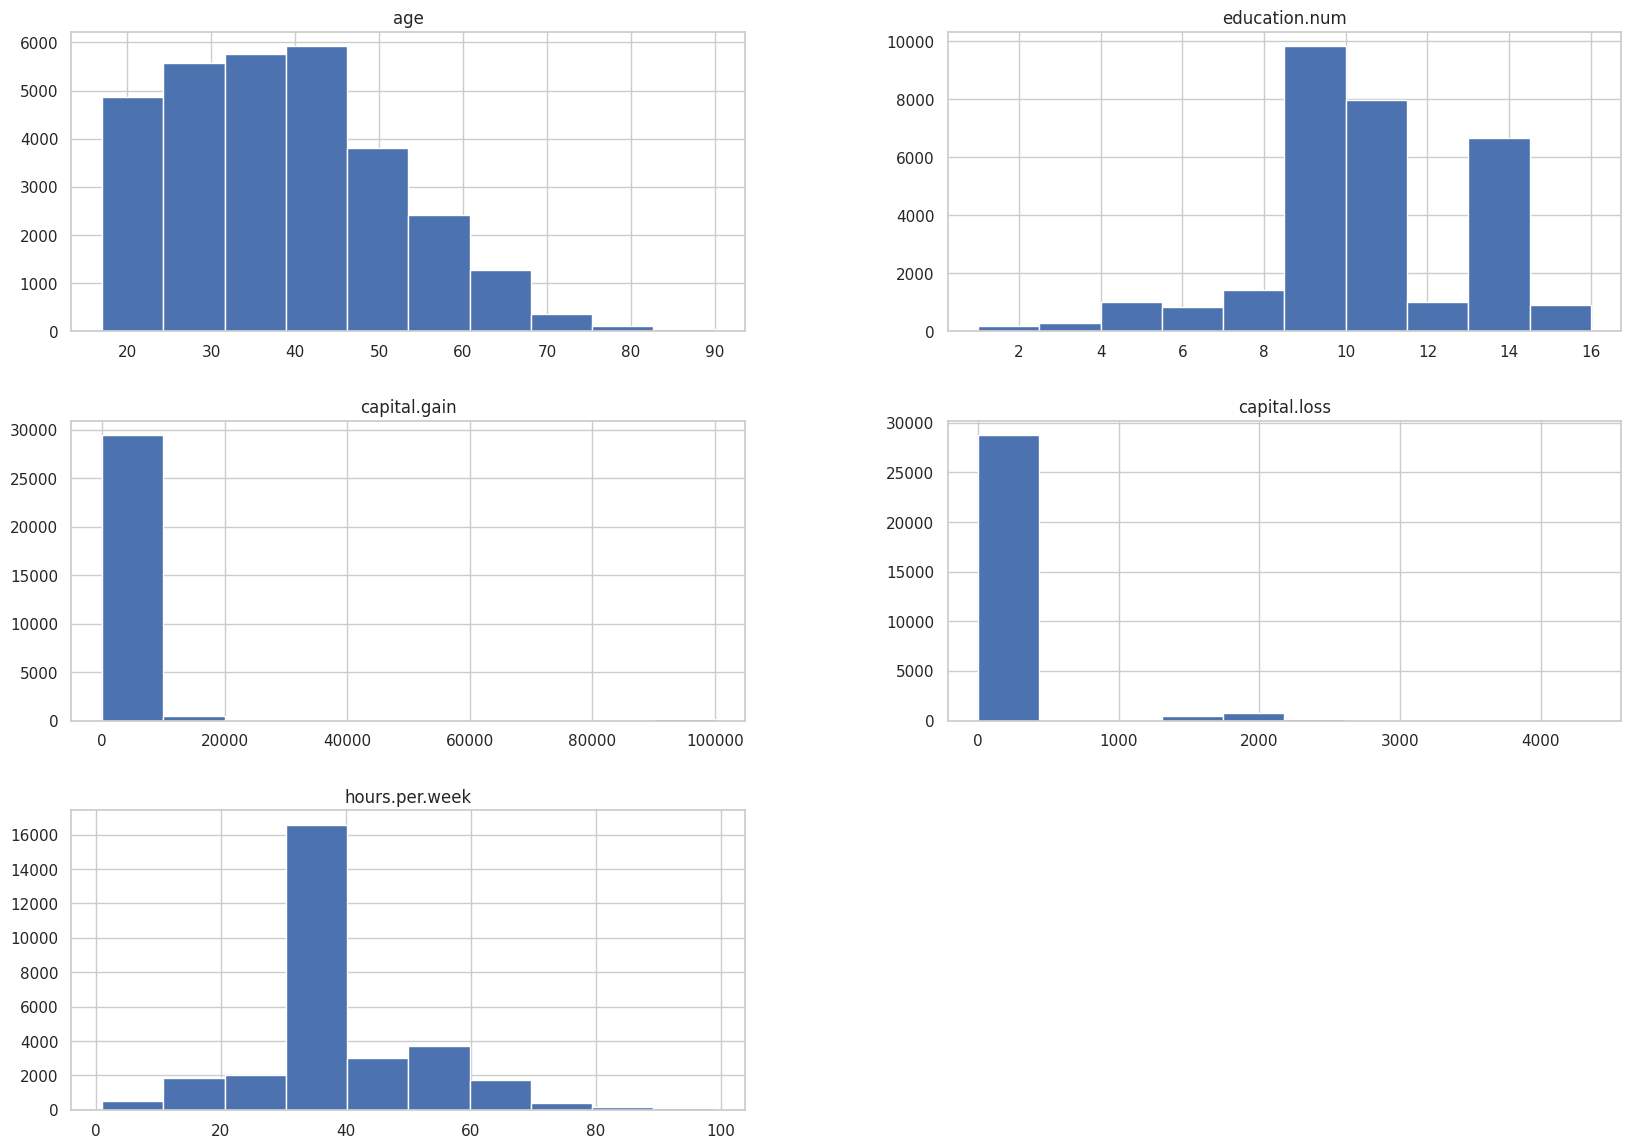

In [17]:
# Visual investigation
_ = df.hist(figsize=(20, 14))

"age": there are not that many points for age > 70. The dataset description does indicate that retired people have been filtered out (hours-per-week > 0);

"education-num": peak at 10 and 13, hard to tell what it corresponds to without looking much further. We’ll do that later in this notebook;

"hours-per-week" peaks at 40, this was very likely the standard number of working hours at the time of the data collection;

most values of "capital-gain" and "capital-loss" are close to zero.

In [18]:
# Distribution variables
df["sex"].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

In [19]:
#Encoding income column
df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

In [20]:
pd.crosstab(index=df["education"], columns=df["education.num"])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,820,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1048,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,377,0,0,0,0,0,0,0,0
1st-4th,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,288,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,557,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,455,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1008,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1307,0,0,0,0,0


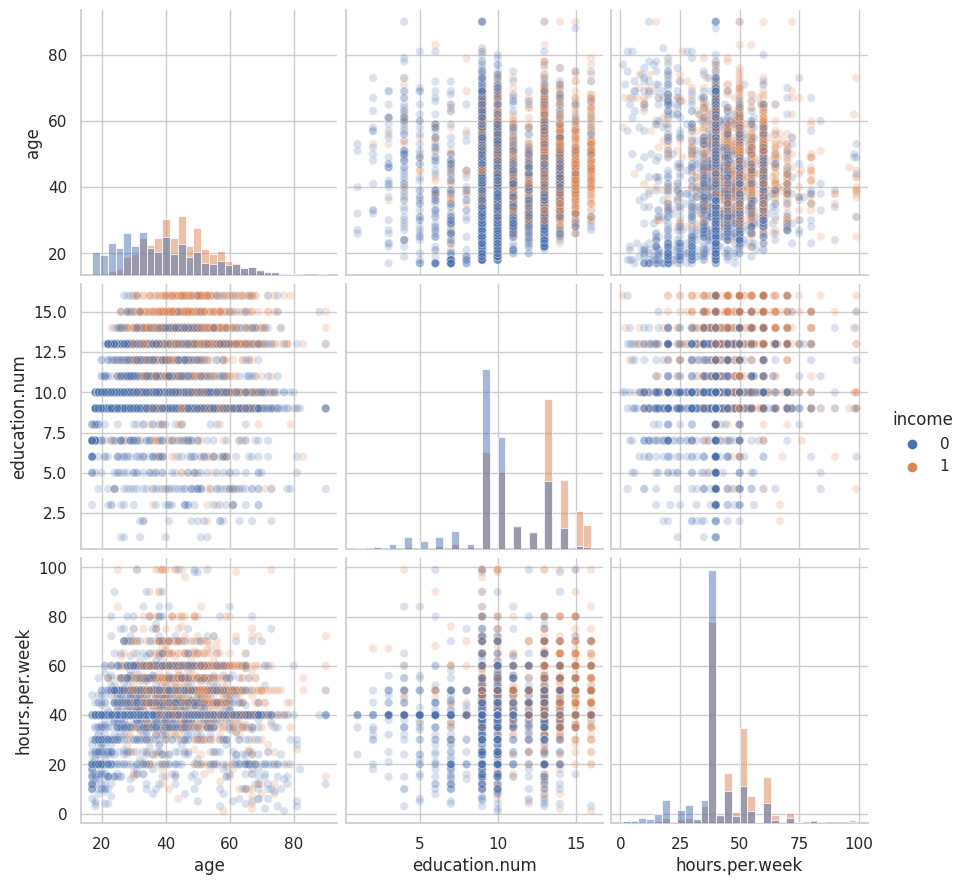

In [21]:
# Inspect the data to pairplot
import seaborn as sns

# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 5000
columns = ["age", "education.num", "hours.per.week"]
_ = sns.pairplot(
    data=df[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

In [22]:
# Shows the maximum value of all columns
df.max(skipna = True, numeric_only = True)

age                  90
education.num        16
capital.gain      99999
capital.loss       4356
hours.per.week       99
income                1
dtype: int64

In [23]:
# Shows the minimum value of all columns
df.min(skipna = True, numeric_only = True)

age               17
education.num      1
capital.gain       0
capital.loss       0
hours.per.week     1
income             0
dtype: int64

In [24]:
# Shows the mode of all numeric columns
df.mode(numeric_only = True)

,age,education.num,capital.gain,capital.loss,hours.per.week,income
0,36,9,0,0,40,0


In [25]:
# Review of Gender
male = df["sex"].value_counts()['Male']
female = df["sex"].value_counts()['Female']
print("Within our dataset, we have {} males and {} females.".format(male, female))
print("To normalize, males take up {:,.2f}% and females take up {:,.2f}% percent of the whole.".format(100*male/df["sex"].count(),100*female/df["sex"].count()))

Within our dataset, we have 20380 males and 9782 females.
To normalize, males take up 67.57% and females take up 32.43% percent of the whole.


In [26]:
#Multi-variable Frequencies (income and sex)
pd.crosstab(df["income"], df["sex"], margins = True)

sex,Female,Male,All
income,,,
0,8670,13984,22654
1,1112,6396,7508
All,9782,20380,30162


<Axes: xlabel='income', ylabel='education.num'>

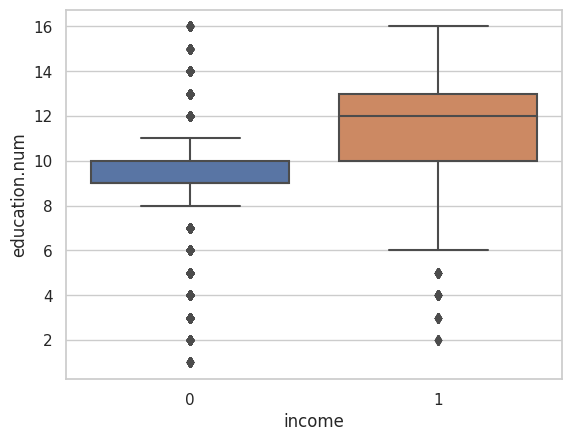

In [27]:
# Creating a series of boxplots to show the distribution of smoker across groups
sns.boxplot(x = df["income"], y = df["education.num"])

In [28]:
# Multi-variable Frequencies (income and native.country)
pd.crosstab(df["income"], df["native.country"], margins = True)

native.country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,All
income,,,,,,,,,,,,,,,,,,,,,
0,11,71,48,54,67,65,23,91,56,15,...,97,9,57,23,14,16,20509,59,10,22654
1,7,36,20,2,25,2,4,9,30,12,...,12,2,14,19,3,2,6995,5,6,7508
All,18,107,68,56,92,67,27,100,86,27,...,109,11,71,42,17,18,27504,64,16,30162


In [29]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.043526,0.080154,0.060165,0.101599,0.241998
education.num,0.043526,1.000000,0.124416,0.079646,0.152522,0.335286
capital.gain,0.080154,0.124416,1.000000,-0.032229,0.080432,0.221196
capital.loss,0.060165,0.079646,-0.032229,1.000000,0.052417,0.150053
hours.per.week,0.101599,0.152522,0.080432,0.052417,1.000000,0.229480
income,0.241998,0.335286,0.221196,0.150053,0.229480,1.000000


# Scikit-learn KMeans to train the data

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn import preprocessing

In [31]:
#Using specific variables
df = pd.read_csv('adult.csv', usecols = ['income', 'education.num', 'hours.per.week', 'age'])
df.head()

,age,education.num,hours.per.week,income
0,90,9,40,<=50K
1,82,9,18,<=50K
2,66,10,40,<=50K
3,54,4,40,<=50K
4,41,10,40,<=50K


In [32]:
#Encoding income column
df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

<Axes: xlabel='income', ylabel='education.num'>

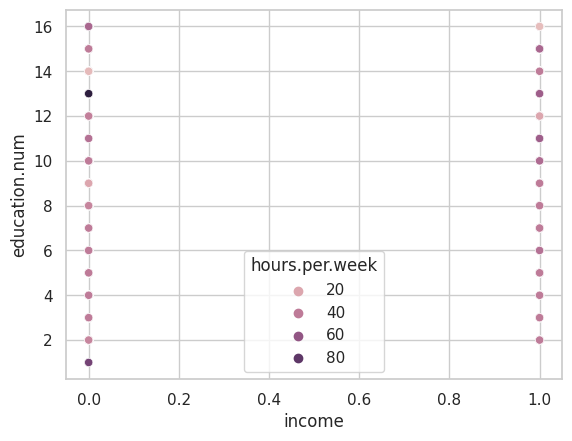

In [33]:
# Visualization
import seaborn as sns

sns.scatterplot(data = df, x = 'income', y = 'education.num', hue = 'hours.per.week')

In [34]:
# Normalizing the data
# Setting up training and test splits using train_test_split from sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['income', 'education.num']], df[['hours.per.week']], test_size=0.33, random_state=0)


In [35]:
# Normalizing the training test using the prepocessing.normalize()
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [36]:
# Fitting and Evaluating the Model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=2, n_init='auto', random_state=0)

<Axes: xlabel='income', ylabel='education.num'>

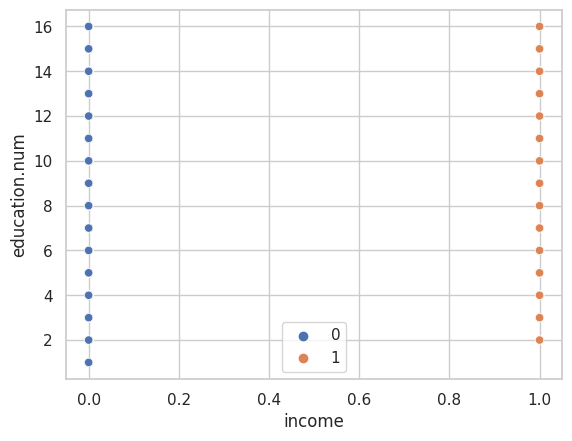

In [37]:
sns.scatterplot(data = X_train, x = 'income', y = 'education.num', hue = kmeans.labels_)

<Axes: ylabel='hours.per.week'>

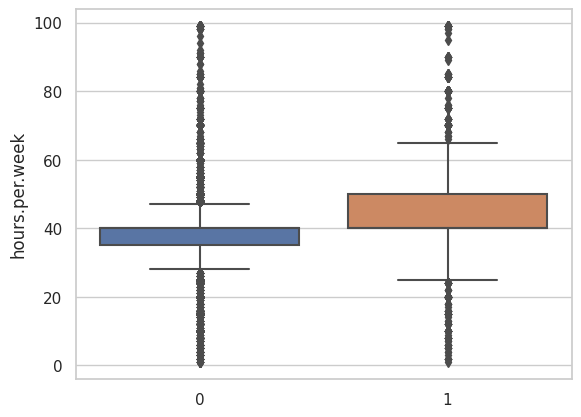

In [38]:
sns.boxplot(x = kmeans.labels_, y = y_train['hours.per.week'])

In [39]:
# Evaluating performance of the clustering algorithm
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')


0.9401343388950739

# Check if the clusters differ with respect to certain interesting features 

In [40]:
# Explore different clusters and compare performance to make decision on the best hyperarameter values 
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='income', ylabel='education.num'>

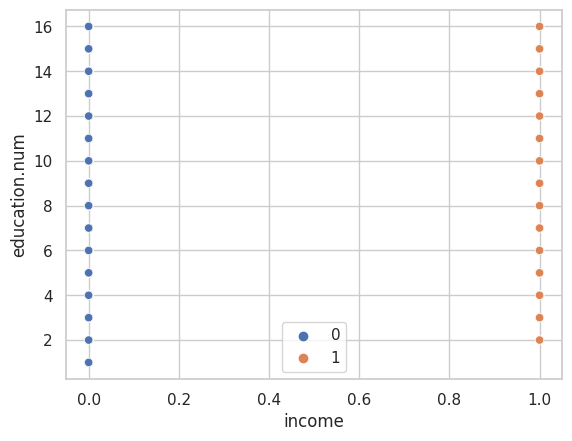

In [41]:
sns.scatterplot(data = X_train, x = 'income', y = 'education.num', hue = fits[0].labels_)

<Axes: xlabel='income', ylabel='education.num'>

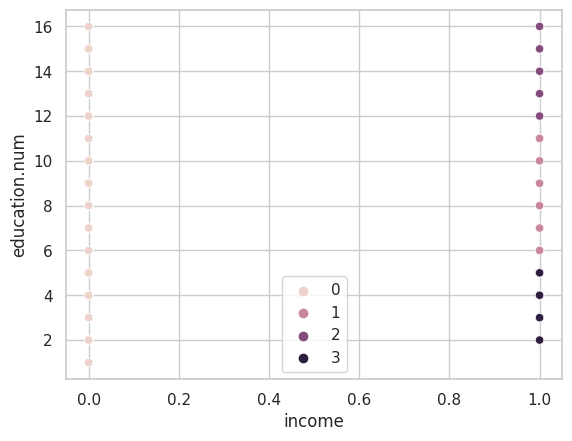

In [42]:
sns.scatterplot(data = X_train, x = 'income', y = 'education.num', hue = fits[2].labels_)

<Axes: xlabel='income', ylabel='education.num'>

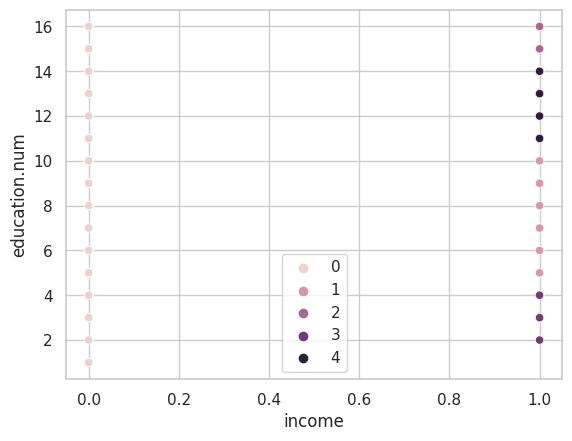

In [43]:
sns.scatterplot(data = X_train, x = 'income', y = 'education.num', hue = fits[3].labels_)

<Axes: ylabel='hours.per.week'>

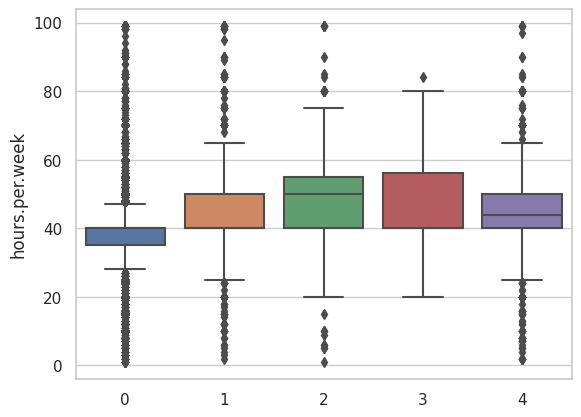

In [44]:
sns.boxplot(x = fits[3].labels_, y = y_train['hours.per.week'])

# Another way of Doing the Kmeans

In [45]:
df = pd.read_csv('adult.csv')
df, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = df.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [46]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    df : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """


    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]
     # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=df, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=df, labels=labels)

pca = PCA(n_components=n_digits).fit(df)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=df, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.354s	69662	0.680	0.719	0.699	0.570	0.695	0.185
random   	0.109s	69707	0.675	0.716	0.694	0.560	0.691	0.174
PCA-based	0.121s	72686	0.636	0.658	0.647	0.521	0.643	0.143
__________________________________________________________________________________


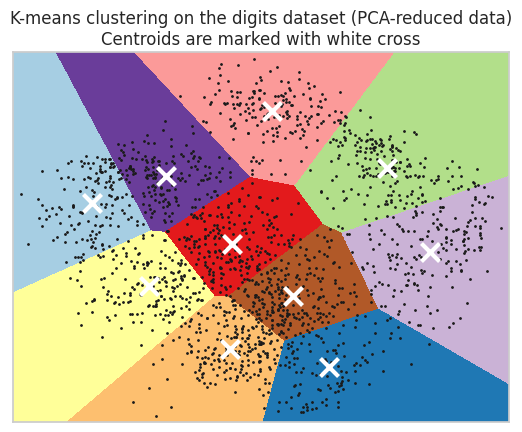

In [48]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(df)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Plot the Elbow Method 

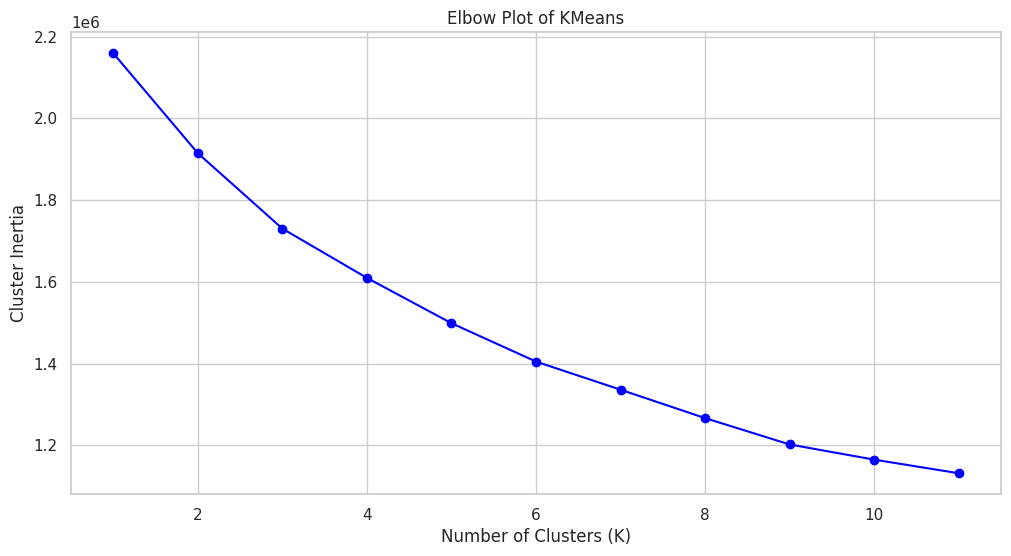

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#identifying optimal K
def optimal_clusters(data, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(data)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

   
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'blue')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

optimal_clusters(df, 12)

# Interpret the result of algorithm